## Iris KNN Classifier

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

## Task 2

Make a KNN classifier on the IRIS dataset using Python. Make sure to split the dataset into training and
testing sets.

In [3]:
iris = datasets.load_iris()

In [4]:
knn = KNeighborsClassifier(n_neighbors=6)

In [5]:
X = iris.data
y = iris.target
#knn.fit(X, y) Fit kun på train set, for at kunne teste med det resterende sæt

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8, random_state=1)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [8]:
predicted = knn.predict(X_test)
print(predicted)
print(y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


## Task 3

Download KNIME. Make a KNN classifier on the IRIS dataset.

![knime.png](../images/knime.png)

![knime:scatter.png](../images/knime_scatter.png)

## Task 4

**Wine KNN Classifier**

Find a dataset that interests you on the UCI Machine Learning Repository. Make a KNN classifier on the
dataset, either in Python or in KNIME. Visualize the classified data.

In [9]:
wine = datasets.load_wine()

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, train_size=0.8, random_state=1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
predicted = knn.predict(X_test)
print(predicted)
print(y_test)

[2 1 2 1 0 1 2 0 2 1 0 1 1 0 2 1 1 0 1 0 0 1 2 0 0 1 0 0 0 2 1 2 1 0 1 1]
[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 1 0 2 0 0 0 2 1 2 2 0 1 1]


In [14]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.75


In [15]:
import seaborn as sns

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
/home/jorg/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

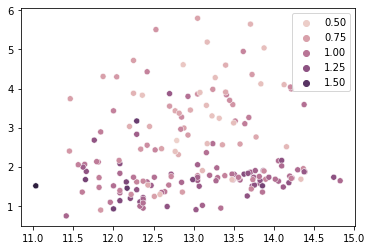

In [16]:
wine = datasets.load_wine() 
print(wine.feature_names)
alcohol = [w[0] for w in wine.data] 
malic_acid = [w[1] for w in wine.data] # æblesyre 
hue = [w[10] for w in wine.data] # vin nuance 
magnesium = [w[4] for w in wine.data] 
#print(alcohol) 
#print(something_else) 
sns.scatterplot(alcohol, malic_acid, hue) # Viser sammenhængen mellem alkoholprocent, æblesyre og vinens farve. 

In [17]:
# Sæt n, split data og træn model.
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, train_size=0.8, random_state=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:

# Test modellen.
predicted = knn.predict(X_test)
accuracy_score(y_test, predicted)

# Nøjagtigheden er relativ lav, fordi der er mange parametre at sammenligne på 
# og fordi værdier ligger tæt. Det er svært at finde den nøjagtige algoritme.

0.75

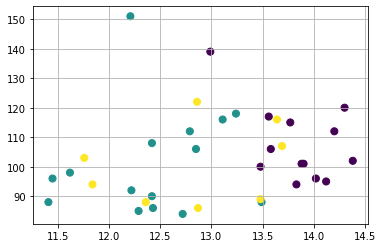

In [19]:
# Lad os se klassificeringen.
predicted = knn.predict(X_test)
alcohol, magnesium = wine.feature_names.index('alcohol'), wine.feature_names.index('magnesium')


plt.title="Alcohol/magnesium"
plt.xlabel = 'alcohol'
plt.ylabel = 'magnesium'
plt.scatter(X_test[:,alcohol], X_test[:,magnesium], c=predicted, s=50, cmap='viridis')


plt.grid(True)
plt.show()

# Her kan vi også se, at der ikke er nogen entydig adskillelse mellem klassificeringerne når vi bruger værdierne for alkohol og magnesium.

## Task 5

Implement a Gaussian Naïve Bayes classifier on the same data set (in either Python or KNIME).

1.0


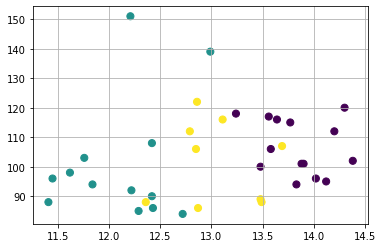

In [20]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)
print(accuracy_score(y_test, predicted))

plt.title="Alcohol/magnesium"
plt.xlabel = 'alcohol'
plt.ylabel = 'magnesium'
plt.scatter(X_test[:,alcohol], X_test[:,magnesium], c=predicted, s=50, cmap='viridis')


plt.grid(True)
plt.show()

## Task 6

Decide which of the two classifiers you would use on new data. What is behind your decision?

Vi kan se af graferne, er der er en større distinktion mellem elementerne, vinene, i grafen, når de klassificeres vha. Gaussian Naïve Bayes. Accuracy scoren er også 1.0 på test-datasættet. Grunden kan formentlig findes i, at de forskellige attributter for vinene, har en uafhængig vægtning, når der bruges GaussianNB, dvs. de har en vægtning baseret på hele populationen; alle vinene.
I KNN ses (formentlig) alene på de nærmeste naboers typer og den hyppigst forekommende vælges. Den skønnes at være billigere, hurtigere men præcisionen lider.